In [2]:
import json
from pandas.io.json import json_normalize
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Rectangle, ConnectionPatch
from matplotlib.offsetbox import  OffsetImage
import squarify
from functools import reduce

In [3]:
def draw_pitch(ax):
    # size of the pitch is 120, 80
    #Create figure

    #Pitch Outline & Centre Line
    plt.plot([0,0],[0,80], color="black")
    plt.plot([0,120],[80,80], color="black")
    plt.plot([120,120],[80,0], color="black")
    plt.plot([120,0],[0,0], color="black")
    plt.plot([60,60],[0,80], color="black")

    #Left Penalty Area
    plt.plot([14.6,14.6],[57.8,22.2],color="black")
    plt.plot([0,14.6],[57.8,57.8],color="black")
    plt.plot([0,14.6],[22.2,22.2],color="black")

    #Right Penalty Area
    plt.plot([120,105.4],[57.8,57.8],color="black")
    plt.plot([105.4,105.4],[57.8,22.5],color="black")
    plt.plot([120, 105.4],[22.5,22.5],color="black")

    #Left 6-yard Box
    plt.plot([0,4.9],[48,48],color="black")
    plt.plot([4.9,4.9],[48,32],color="black")
    plt.plot([0,4.9],[32,32],color="black")

    #Right 6-yard Box
    plt.plot([120,115.1],[48,48],color="black")
    plt.plot([115.1,115.1],[48,32],color="black")
    plt.plot([120,115.1],[32,32],color="black")
    
    centreCircle = plt.Circle((60,40),8.1,color="black",fill=False)
    centreSpot = plt.Circle((60,40),0.71,color="black")
    leftPenSpot = plt.Circle((9.7,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")

    #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)

    #Prepare Arcs
    # arguments for arc
    # x, y coordinate of centerpoint of arc
    # width, height as arc might not be circle, but oval
    # angle: degree of rotation of the shape, anti-clockwise
    # theta1, theta2, start and end location of arc in degree
    leftArc = Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")

    #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)

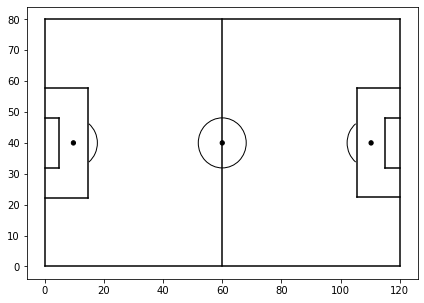

In [4]:

fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax)
plt.show()

In [5]:
# loading the json file
with open('open-data/data/events/7567.json') as data_file:    
    data = json.load(data_file)

In [6]:
df = json_normalize(data, sep = "_")

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


In [9]:
df['player_name']

0                NaN
1                NaN
2                NaN
3                NaN
4        Mesut Ã–zil
            ...     
3703    Hyun-Woo Cho
3704             NaN
3705    Hyun-Woo Cho
3706             NaN
3707             NaN
Name: player_name, Length: 3708, dtype: object

In [10]:
ozil_pass = df[(df['type_name'] == "Pass") & (df['player_name']=='Mesut Ã–zil')] # get passing information of Ozil
pass_column = [i for i in df.columns if i.startswith("pass")]
ozil_pass = ozil_pass[["id", "period", "timestamp", "location", "pass_end_location", "pass_recipient_name"]]
ozil_pass.head()

,id,period,timestamp,location,pass_end_location,pass_recipient_name
4,ee674161-e20e-42a3-a045-235673ba58c9,1,00:00:00.187,"[61.0, 41.0]","[49.0, 35.0]",Toni Kroos
12,91f09706-1eec-42f1-96cb-190ac7ae53f5,1,00:00:04.200,"[55.0, 43.0]","[37.0, 59.0]",Niklas SÃ¼le
145,abfc6d78-f879-4498-bbdf-046d6b8e4dde,1,00:02:53.600,"[65.0, 23.0]","[71.0, 27.0]",Marco Reus
168,f08412b3-88af-4f50-b7d8-37e13bd21192,1,00:03:03.517,"[60.0, 25.0]","[56.0, 38.0]",Sami Khedira
187,5c4919f5-f081-4ab0-81ec-6e585de19a2e,1,00:03:15.080,"[67.0, 45.0]","[56.0, 32.0]",Toni Kroos


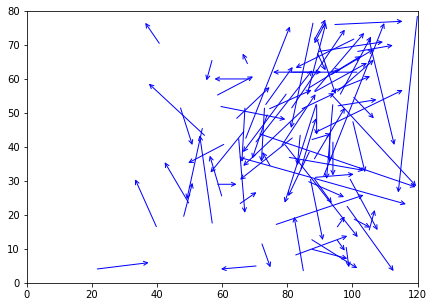

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
ax.set_xlim([0,120])
ax.set_ylim([0,80])
for i in range(len(ozil_pass)):
    # can also differentiate by color
    color = "blue" if ozil_pass.iloc[i]['period'] == 1 else "red"
    ax.annotate("", xy = (ozil_pass.iloc[i]['pass_end_location'][0], ozil_pass.iloc[i]['pass_end_location'][1]), xycoords = 'data',
               xytext = (ozil_pass.iloc[i]['location'][0], ozil_pass.iloc[i]['location'][1]), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "blue"),)
plt.show()

In [12]:
# extract players involvement in the entire game
ozil_action = df[(df['player_name']=='Mesut Ã–zil')][["id", "type_name","period", "timestamp", "location"]]
ozil_action.head()


,id,type_name,period,timestamp,location
4,ee674161-e20e-42a3-a045-235673ba58c9,Pass,1,00:00:00.187,"[61.0, 41.0]"
10,e9cd096f-d810-4062-9fcb-1e047e68ab0f,Ball Receipt*,1,00:00:02.960,"[58.0, 42.0]"
11,2a11a42d-e250-4150-bde9-6bdbc0164a9c,Carry,1,00:00:02.960,"[58.0, 42.0]"
12,91f09706-1eec-42f1-96cb-190ac7ae53f5,Pass,1,00:00:04.200,"[55.0, 43.0]"
79,b73c7c98-6ead-4813-a2d1-8aa6be8bdbc0,Interception,1,00:01:36.080,"[12.0, 28.0]"


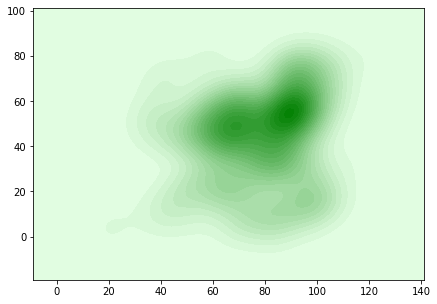

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)

x_coord = [i[0] for i in ozil_action["location"]]
y_coord = [i[1] for i in ozil_action["location"]]

#shades: give us the heat map we desire
# n_levels: draw more lines, the larger n, the more bluerry it loos
sns.kdeplot(x_coord, y_coord, shade = "True", color = "green", n_levels = 30)
plt.show()

In [14]:
def heat_pass_map(data, player_name):
    pass_data = data[(data['type_name'] == "Pass") & (data['player_name'] == player_name)]
    action_data = data[(data['player_name']==player_name)]
    
    fig=plt.figure()
    fig.set_size_inches(7, 5)
    ax=fig.add_subplot(1,1,1)
    draw_pitch(ax)
    plt.axis('off')

    for i in range(len(pass_data)):
        # we also differentiate different half by different color
        color = "blue" if pass_data.iloc[i]['period'] == 1 else "red"
        ax.annotate("", xy = (pass_data.iloc[i]['pass_end_location'][0], pass_data.iloc[i]['pass_end_location'][1]), xycoords = 'data',
               xytext = (pass_data.iloc[i]['location'][0], pass_data.iloc[i]['location'][1]), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = color),)
    x_coord = [i[0] for i in action_data["location"]]
    y_coord = [i[1] for i in action_data["location"]]
    sns.kdeplot(x_coord, y_coord, shade = "True", color = "green", n_levels = 30)
    plt.ylim(0, 80) # need this, otherwise kde plot will go outside
    plt.xlim(0, 120)
    plt.show()

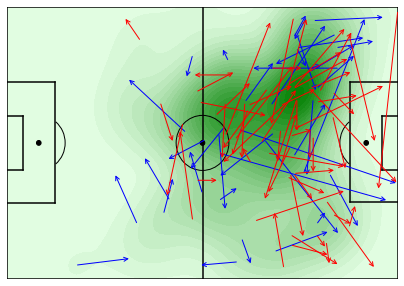

In [15]:
heat_pass_map(df, 'Mesut Ã–zil')